In [2]:
import numpy as np
import scipy.optimize as sc
import matplotlib.pyplot as plt
import os
from scipy.signal import find_peaks

plt.rcParams['figure.dpi'] = 150

cm = 1.5/2.54 #define ratio for cm and inches

In [3]:
Data_names = []

# Method for going through all the data we have, and it fucking works dawg
for (dir_path, dir_names, file_names) in os.walk('./Data_Labday_2_salt'):
    for file_name in file_names:
        if file_name.endswith('.txt'): #ensures we grab only the files ending with .txt
            Data_names.append(os.path.join(dir_path, file_name))

In [4]:
wavelength = [] #Wavelength list
absorbtion = [] # Intensity list


for Data_name in Data_names:
    Data = np.loadtxt(Data_name, skiprows=1)
    wavelength.append(Data[:, 0])
    absorbtion.append(Data[:, 1]) 

Text(0.5, 0, 'Wavelength $\\lambda$')

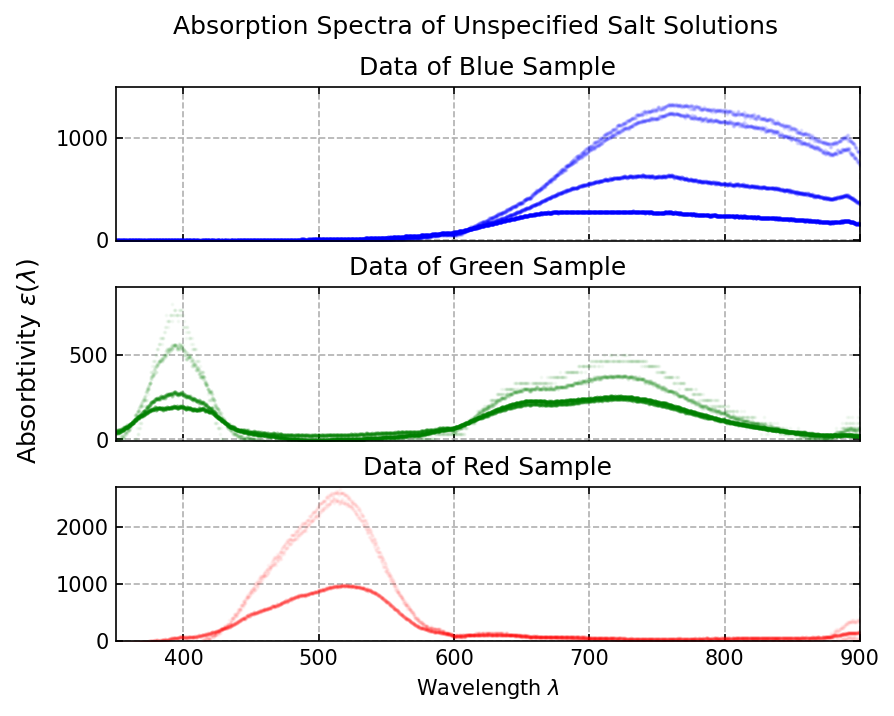

In [5]:
#Plot for B substance

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex = True)

c = [0.08, 0.09, 0.21, 0.5, 0.03, 0.09, 0.24, 0.38, 0, 0.03, 0.03, 0.12]

l = 0.01

for i, Data_name in enumerate(Data_names):
    if i <= 3:
        ax1.plot(wavelength[i], absorbtion[i]/(c[i]*l), '.', color = 'blue', markersize = 2, alpha = c[i], label = 'BX')
        ax1.grid(ls = '--')
        ax1.set_xlim((350, 900))
        ax1.set_ylim(-10, 1500)
    elif 4 <= i <= 7:
        ax2.plot(wavelength[i], absorbtion[i]/(c[i]*l), '.', color = 'green', markersize = 2, alpha = c[i], label = 'GX')
        ax2.grid(ls = '--')
        ax2.set_ylim(-10, 900)
    elif 9 <= i <= len(Data_names):
        ax3.plot(wavelength[i], absorbtion[i]/(c[i]*l), '.', color = 'red', markersize = 2, alpha = c[i], label = 'RX')
        ax3.grid(ls = '--')  
        ax3.set_ylim(-10, 2700) 
            
ax1.tick_params(direction = 'in', top = True, right = True)
ax1.set_title('Data of Blue Sample')

ax2.tick_params(direction = 'in', top = True, right = True)
ax2.set_title('Data of Green Sample')

ax3.tick_params(direction = 'in', top = True, right = True)
ax3.set_title('Data of Red Sample')

plt.subplots_adjust(hspace = 0.3)
fig.suptitle('Absorption Spectra of Unspecified Salt Solutions')
fig.supylabel(r'Absorbtivity $\varepsilon (\lambda)$')
plt.xlabel(r'Wavelength $\lambda$')